In [1]:
# D208 Code Task Two

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


C:\Users\bower\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Import csv dataset

medical_data = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\WGU\D208\3kfid8emf9rkc9ek30sf (2)\medical_clean.csv")

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Create New DataFrame with target and explanatory variables

df_medical = pd.DataFrame(medical_data[['ReAdmis','Age','Marital','Gender','Doc_visits','Initial_admin','Complication_risk','Services','Initial_days','TotalCharge','Children']])

In [6]:
# Get info from the data / check for null values

df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ReAdmis            10000 non-null  object 
 1   Age                10000 non-null  int64  
 2   Marital            10000 non-null  object 
 3   Gender             10000 non-null  object 
 4   Doc_visits         10000 non-null  int64  
 5   Initial_admin      10000 non-null  object 
 6   Complication_risk  10000 non-null  object 
 7   Services           10000 non-null  object 
 8   Initial_days       10000 non-null  float64
 9   TotalCharge        10000 non-null  float64
 10  Children           10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [7]:
# Get info from the data

df_medical.describe()

,Age,Doc_visits,Initial_days,TotalCharge,Children
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455299,5312.172769,2.097200
std,20.638538,1.045734,26.309341,2180.393838,2.163659
min,18.000000,1.000000,1.001981,1938.312067,0.000000
25%,36.000000,4.000000,7.896215,3179.374015,0.000000
50%,53.000000,5.000000,35.836244,5213.952000,1.000000
75%,71.000000,6.000000,61.161020,7459.699750,3.000000
max,89.000000,9.000000,71.981490,9180.728000,10.000000


Outliers Present


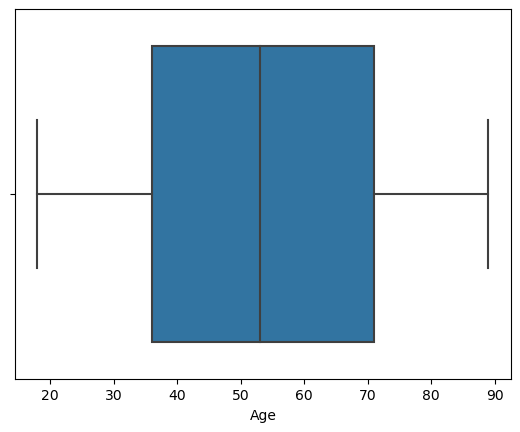

In [8]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Age', data=df_medical)

# Outliers Need Treatment

print("Outliers Present")

No Outliers


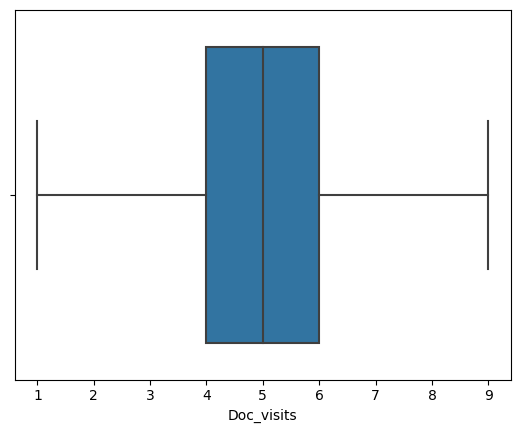

In [9]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Doc_visits', data=df_medical)

# No Outliers

print("No Outliers")

Outliers Present


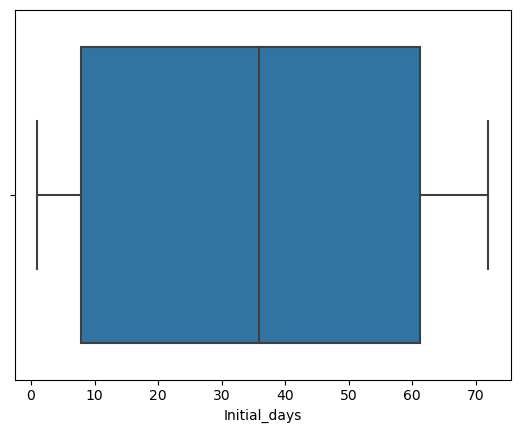

In [10]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Initial_days', data=df_medical)

# Outliers Need Treatment

print("Outliers Present")

No Outliers


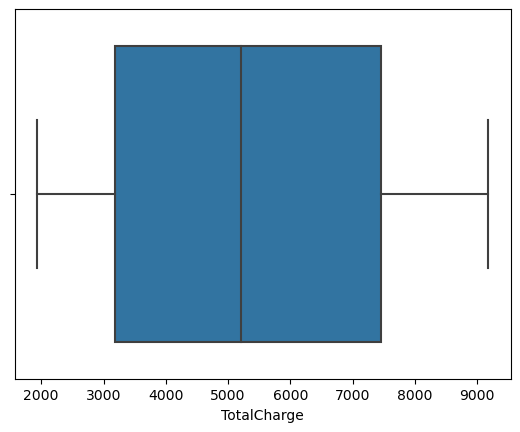

In [11]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='TotalCharge', data=df_medical)

# No Outliers

print("No Outliers")

No Outliers


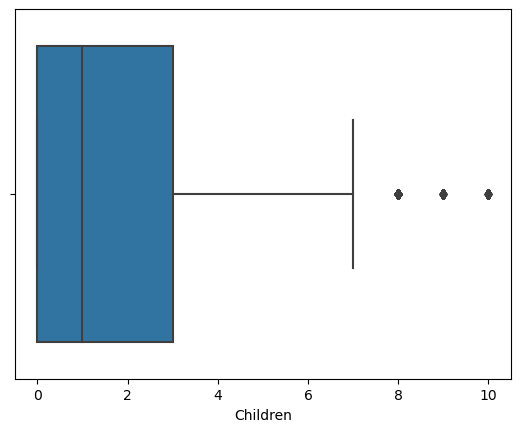

In [12]:


# Detect outliers with visualisations

boxplot = sns.boxplot(x='Children', data=df_medical)

# No Outliers

print("No Outliers")

In [13]:
# Print out which variables have outliers

outliers_med = "These features have outliers: Children"
outliers_med

'These features have outliers: Children'

In [14]:
# Remove outliers for Children

df_medical['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

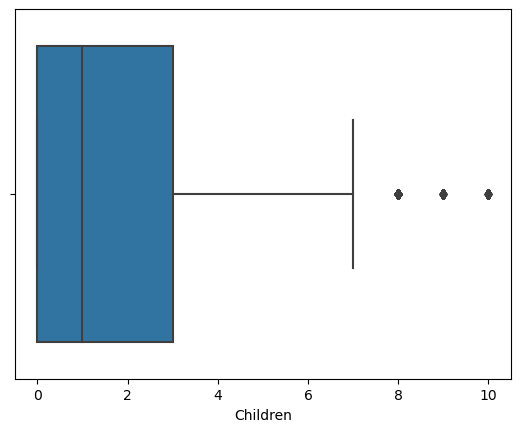

In [15]:
boxplot = sns.boxplot(x='Children', data=df_medical)

In [16]:
df_medical['Children'] = np.where(df_medical['Children'] > 7, np.nan, df_medical['Children'])

count    9589.000000
mean        1.813328
std         1.700875
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

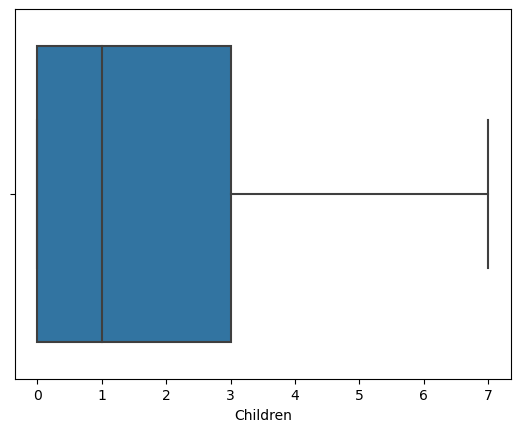

In [17]:
boxplot = sns.boxplot(x='Children', data=df_medical)
df_medical['Children'].describe()

# All outliers are removed

In [18]:
# Summary statistics for each variable

df_medical['ReAdmis'].value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [113]:
df_medical['ReAdmis'].describe()

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

In [19]:
df_medical['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [20]:
df_medical['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [21]:
df_medical['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [22]:
df_medical['Marital'].describe()

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object

In [23]:
df_medical['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [109]:
df_medical['Gender'].describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

In [24]:
df_medical['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [25]:
df_medical['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [26]:
df_medical['Children'].describe()

count    9589.000000
mean        1.813328
std         1.700875
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

In [27]:
df_medical['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [110]:
df_medical['Initial_admin'].describe()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object

In [28]:
df_medical['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [111]:
df_medical['Complication_risk'].describe()

count      10000
unique         3
top       Medium
freq        4517
Name: Complication_risk, dtype: object

In [29]:
df_medical['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [112]:
df_medical['Services'].describe()

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object

In [30]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ReAdmis            10000 non-null  object 
 1   Age                10000 non-null  int64  
 2   Marital            10000 non-null  object 
 3   Gender             10000 non-null  object 
 4   Doc_visits         10000 non-null  int64  
 5   Initial_admin      10000 non-null  object 
 6   Complication_risk  10000 non-null  object 
 7   Services           10000 non-null  object 
 8   Initial_days       10000 non-null  float64
 9   TotalCharge        10000 non-null  float64
 10  Children           9589 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


In [31]:
# Imputation of Children

# Impute the median for outliers

df_medical['Children'].fillna(df_medical['Children'].median(), inplace=True)

C:\Users\bower\AppData\Local\Temp\ipykernel_10280\2303504358.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_medical['Children'].fillna(df_medical['Children'].median(), inplace=True)


In [32]:
df_medical.info()

# All nulls are removed, All outliers are removed. Imputation successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ReAdmis            10000 non-null  object 
 1   Age                10000 non-null  int64  
 2   Marital            10000 non-null  object 
 3   Gender             10000 non-null  object 
 4   Doc_visits         10000 non-null  int64  
 5   Initial_admin      10000 non-null  object 
 6   Complication_risk  10000 non-null  object 
 7   Services           10000 non-null  object 
 8   Initial_days       10000 non-null  float64
 9   TotalCharge        10000 non-null  float64
 10  Children           10000 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.5+ KB


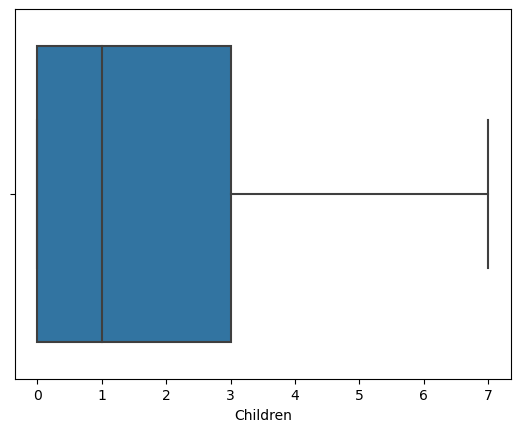

In [33]:
boxplot = sns.boxplot(x='Children', data=df_medical)

In [34]:
# Exploratory Data Analysis -----


In [35]:
# Univariate Analyses on explanatory numeric variables:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Doc_visits'}>],
       [<Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'Children'}>],
       [<Axes: title={'center': 'TotalCharge'}>, <Axes: >]], dtype=object)

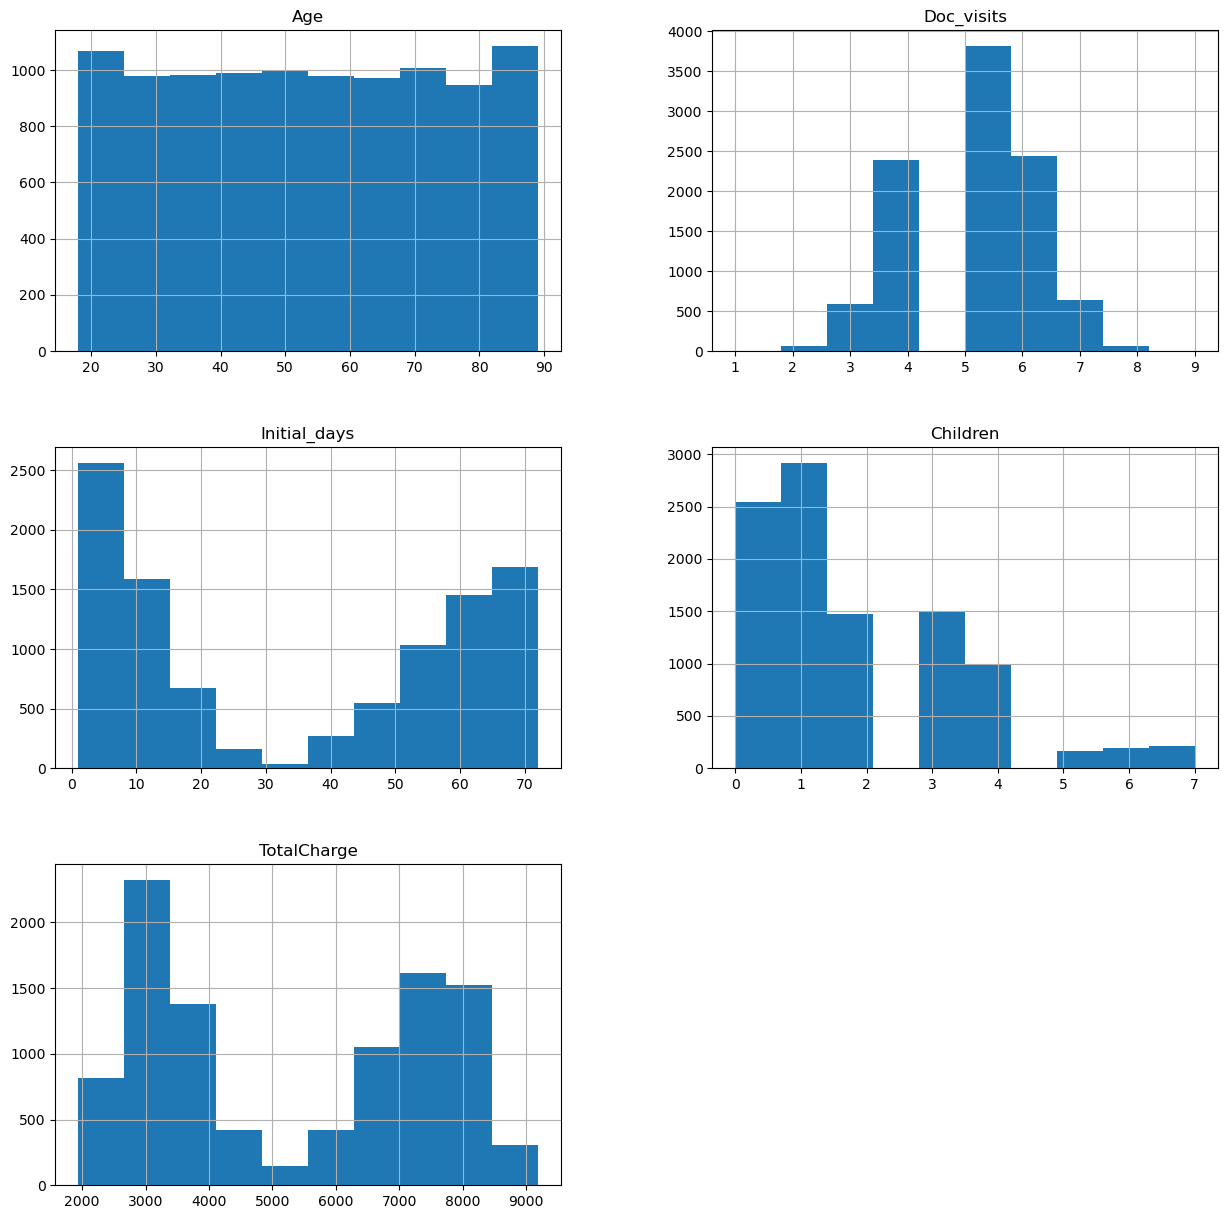

In [36]:
df_medical[['Age', 'Doc_visits', 'Initial_days', 'Children', 'TotalCharge']].hist(figsize=(15,15))

In [37]:
# Univariate statistics for each numeric variable

df_medical[['Age', 'Doc_visits', 'Initial_days', 'Children', 'TotalCharge']].describe()

,Age,Doc_visits,Initial_days,Children,TotalCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455299,1.779900,5312.172769
std,20.638538,1.045734,26.309341,1.673361,2180.393838
min,18.000000,1.000000,1.001981,0.000000,1938.312067
25%,36.000000,4.000000,7.896215,0.000000,3179.374015
50%,53.000000,5.000000,35.836244,1.000000,5213.952000
75%,71.000000,6.000000,61.161020,3.000000,7459.699750
max,89.000000,9.000000,71.981490,7.000000,9180.728000


In [38]:
# Univariate Analyses of Categorical Variables 


ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

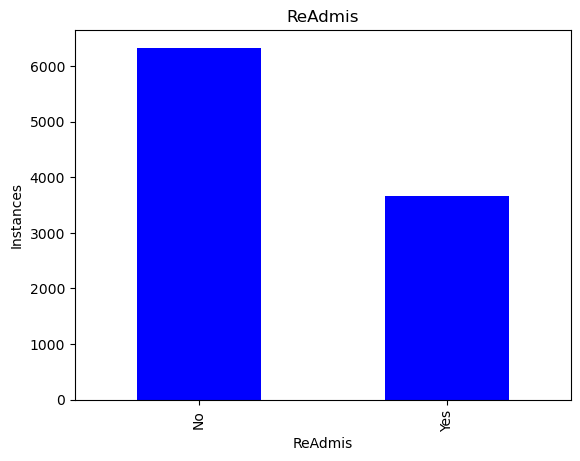

In [39]:
# ReAdmis

df_medical['ReAdmis'].value_counts().plot(kind='bar', color="Blue", xlabel='ReAdmis', ylabel="Instances", title="ReAdmis")

df_medical['ReAdmis'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

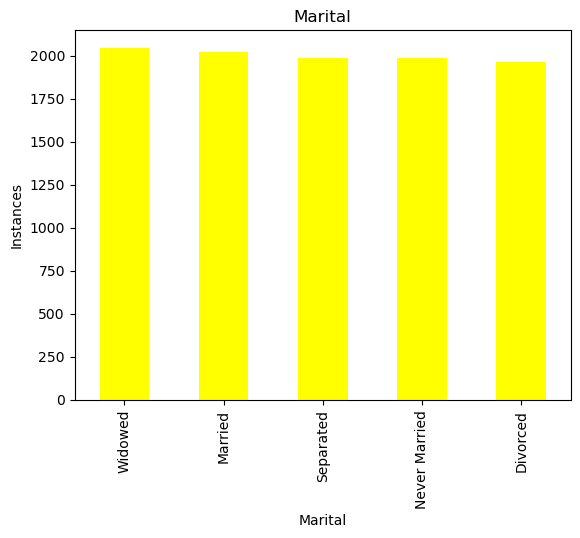

In [40]:
# Marital

df_medical['Marital'].value_counts().plot(kind='bar', color="Yellow", xlabel='Marital', ylabel="Instances", title="Marital")

df_medical['Marital'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

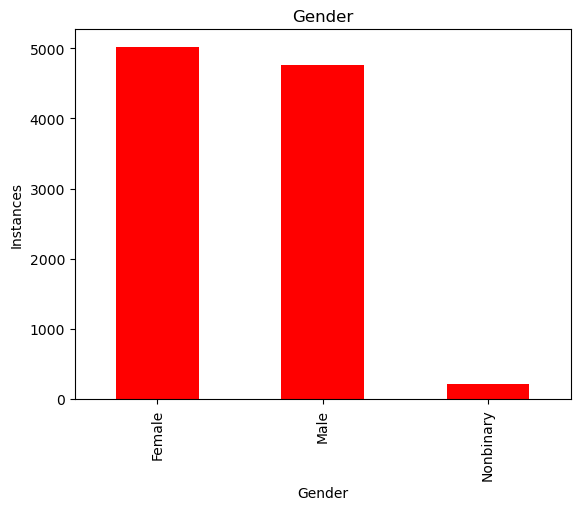

In [41]:
# Gender

df_medical['Gender'].value_counts().plot(kind='bar', color="Red", xlabel='Gender', ylabel="Instances", title="Gender")

df_medical['Gender'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

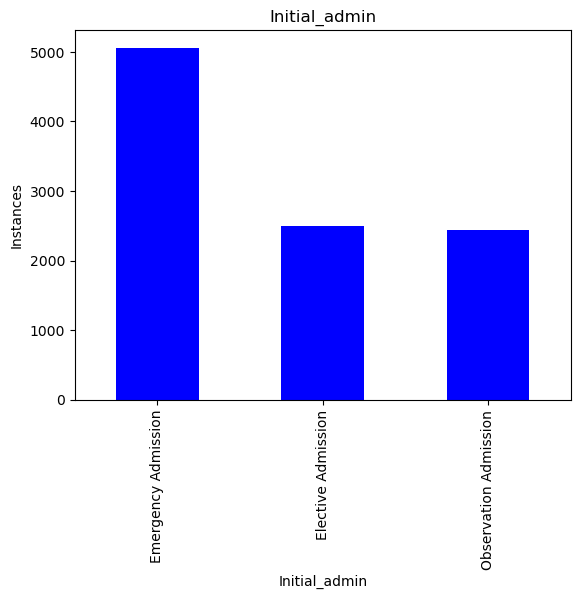

In [42]:
# Initial_admin

df_medical['Initial_admin'].value_counts().plot(kind='bar', color="Blue", xlabel='Initial_admin', ylabel="Instances", title="Initial_admin")

df_medical['Initial_admin'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

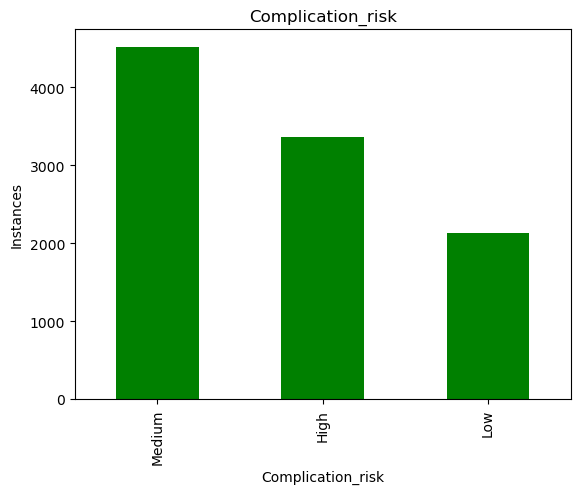

In [43]:
# Complication_risk

df_medical['Complication_risk'].value_counts().plot(kind='bar', color="Green", xlabel='Complication_risk', ylabel="Instances", title="Complication_risk")

df_medical['Complication_risk'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

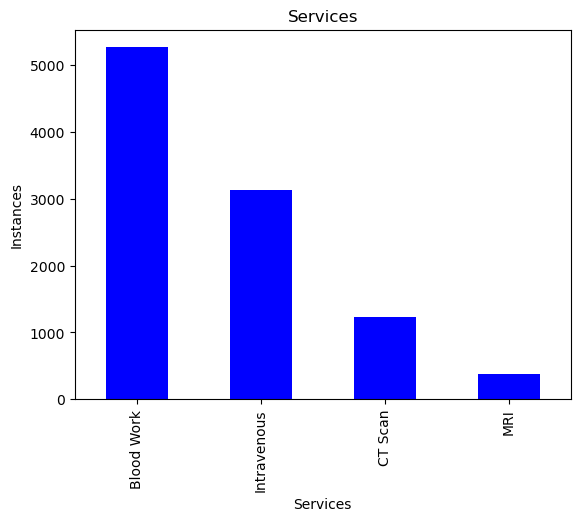

In [44]:
# Services

df_medical['Services'].value_counts().plot(kind='bar', color="Blue", xlabel='Services', ylabel="Instances", title="Services")

df_medical['Services'].value_counts()

In [45]:
# Bivariate Analysis - Visualizations and Statistics

<Axes: xlabel='Age', ylabel='ReAdmis'>

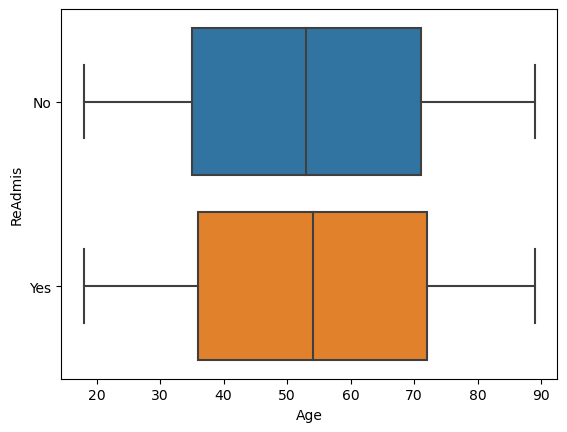

In [46]:
# ReAdmis and Age

sns.boxplot(x='Age', y='ReAdmis', data=df_medical)

<Axes: xlabel='Doc_visits', ylabel='ReAdmis'>

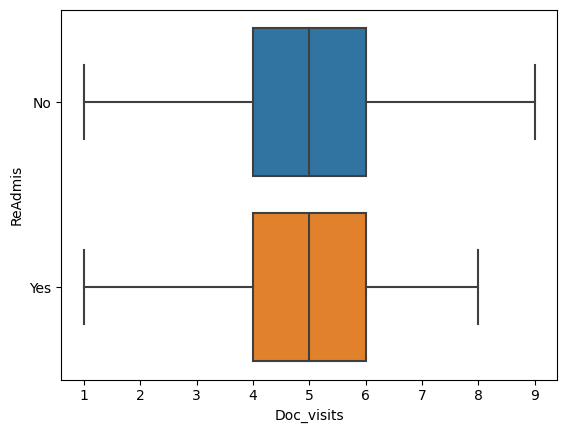

In [47]:
# ReAdmis and Doc_visits

sns.boxplot(x='Doc_visits', y='ReAdmis', data=df_medical)

<Axes: xlabel='Initial_days', ylabel='ReAdmis'>

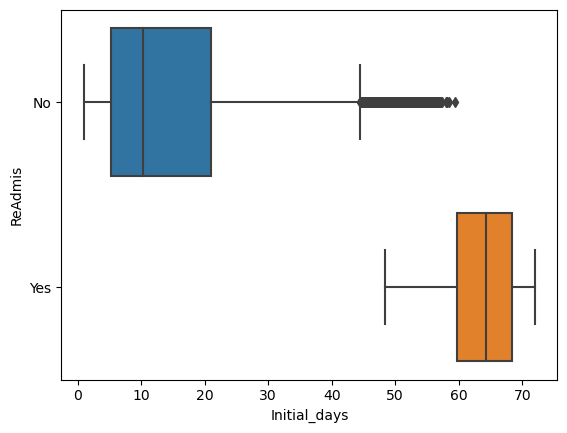

In [48]:
# ReAdmis and Initial_days

sns.boxplot(x='Initial_days', y='ReAdmis', data=df_medical)

<Axes: xlabel='TotalCharge', ylabel='ReAdmis'>

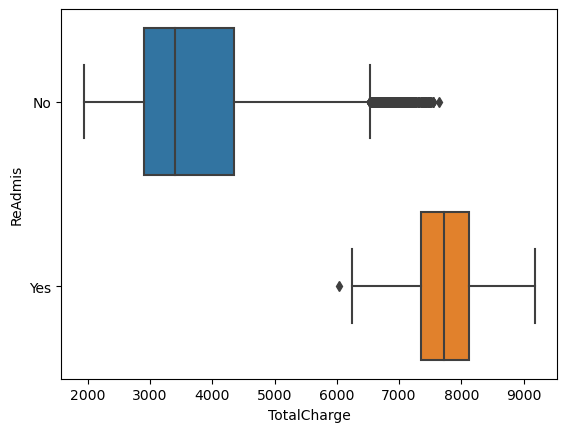

In [49]:
# ReAdmis and TotalCharge

sns.boxplot(x='TotalCharge', y='ReAdmis', data=df_medical)

<Axes: xlabel='Children', ylabel='ReAdmis'>

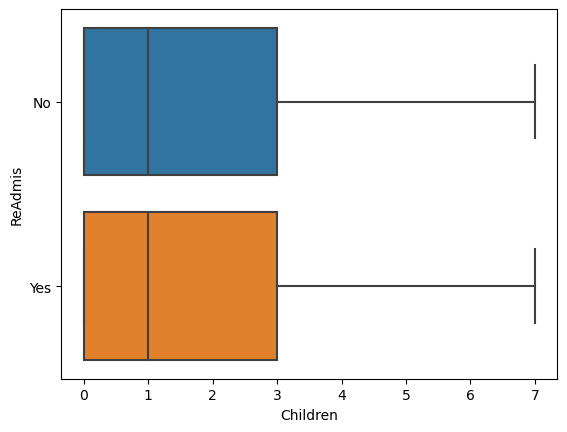

In [50]:
# ReAdmis and Children

sns.boxplot(x='Children', y='ReAdmis', data=df_medical)

In [51]:
# Bivariate for Categoricals

C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ReAdmis', ylabel='Count'>

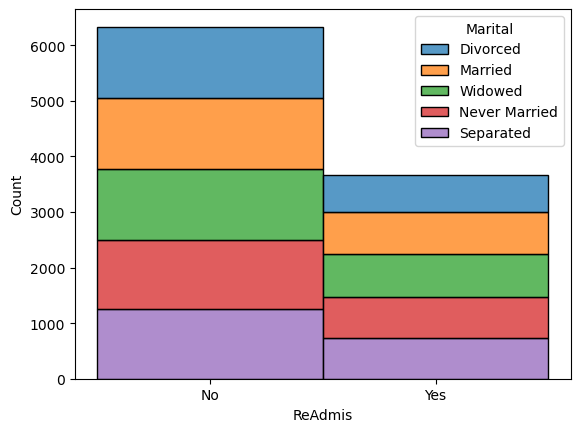

In [52]:
# ReAdmis and Marital

sns.histplot(binwidth=1, x="ReAdmis", hue="Marital", data=medical_data, stat="count", multiple="stack")

C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ReAdmis', ylabel='Count'>

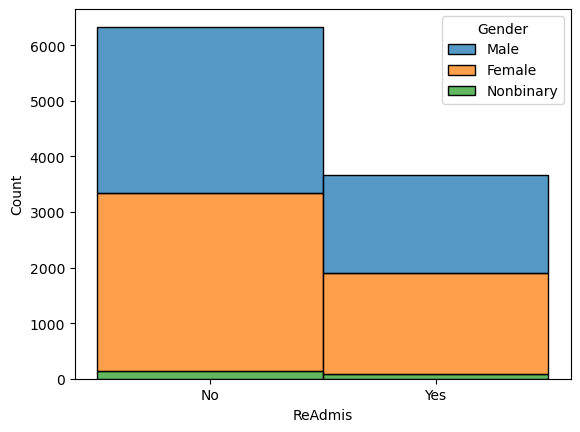

In [53]:
# ReAdmis and Gender

sns.histplot(binwidth=1, x="ReAdmis", hue="Gender", data=medical_data, stat="count", multiple="stack")

C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ReAdmis', ylabel='Count'>

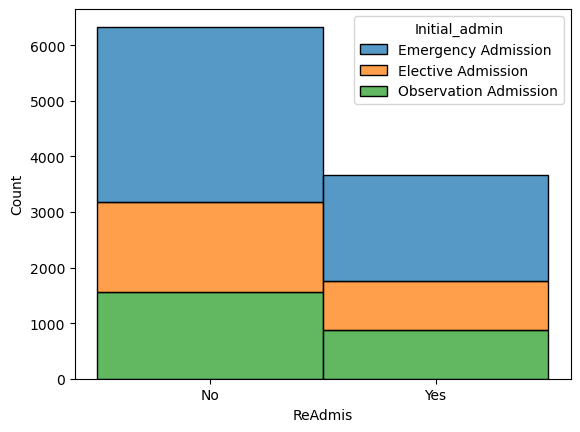

In [54]:
# ReAdmis and Initial_admin

sns.histplot(binwidth=1, x="ReAdmis", hue="Initial_admin", data=medical_data, stat="count", multiple="stack")

C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ReAdmis', ylabel='Count'>

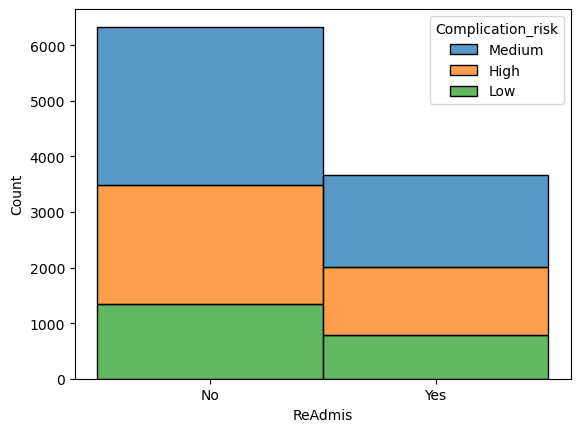

In [55]:
# ReAdmis and Compication_risk

sns.histplot(binwidth=1, x="ReAdmis", hue="Complication_risk", data=medical_data, stat="count", multiple="stack")

C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\bower\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='ReAdmis', ylabel='Count'>

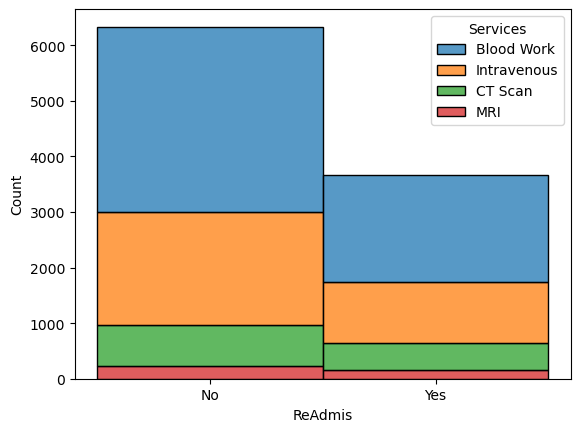

In [56]:
# ReAdmis and Services

sns.histplot(binwidth=1, x="ReAdmis", hue="Services", data=medical_data, stat="count", multiple="stack")

In [57]:
# These next two blocks of code were made into comments to use as reference for myself in the future. 

# Creating new datadrame for categorical variables to get summary statistics

# sum_stats_cat_df = pd.DataFrame(df_medical[['Marital','Gender','Initial_admin','Complication_risk','Services','ReAdmis']])

In [58]:
# Reclassifying categorical variables to numbers

# sum_stats_cat_df['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], [0, 1, 2, 3], inplace=True)
# sum_stats_cat_df['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [0, 1, 2], inplace=True)
# sum_stats_cat_df['Gender'].replace(['Male', 'Female', 'Nonbinary'], [0, 1, 2], inplace=True)
# sum_stats_cat_df['Marital'].replace(['Divorced', 'Married', 'Widowed','Never Married','Separated'], [0, 1, 2, 3, 4], inplace=True)
# sum_stats_cat_df['Complication_risk'].replace(['Low','Medium','High'], [0, 1, 2], inplace=True)
#sum_stats_cat_df['ReAdmis'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [59]:
# Get Dummies

services_dummies = pd.get_dummies(df_medical['Services'], drop_first=True, dtype=int)
services_dummies

,CT Scan,Intravenous,MRI
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,1,0,0
9997,0,1,0
9998,0,0,0


In [60]:
# Get Dummies

marital_dummies = pd.get_dummies(df_medical['Marital'], drop_first=True, dtype=int)
marital_dummies

,Married,Never Married,Separated,Widowed
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
9995,0,0,0,1
9996,0,0,0,1
9997,0,0,1,0
9998,0,0,0,0


In [61]:
# Get Dummies

gender_dummies = pd.get_dummies(df_medical['Gender'], drop_first=True, dtype=int)
gender_dummies

,Male,Nonbinary
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
9995,1,0
9996,1,0
9997,0,0
9998,1,0


In [62]:
# Get Dummies

initial_admin_dummies = pd.get_dummies(df_medical['Initial_admin'], drop_first=True, dtype=int)
initial_admin_dummies

,Emergency Admission,Observation Admission
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,1,0
9996,0,0
9997,0,0
9998,1,0


In [63]:
# Get Dummies

complication_risk_dummies = pd.get_dummies(df_medical['Complication_risk'], drop_first=True, dtype=int)
complication_risk_dummies

,Low,Medium
0,0,1
1,0,0
2,0,1
3,0,1
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,0,0
9998,0,1


In [64]:
# Get Dummies

readmis_dummies = pd.get_dummies(df_medical['ReAdmis'], drop_first=True, dtype=int)
readmis_dummies

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,1
9997,1
9998,1


In [65]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, services_dummies], axis=1)
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Children,CT Scan,Intravenous,MRI
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.0,0,0,0
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,3.0,0,1,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,3.0,0,0,0
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,0.0,0,0,0
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,2.0,0,1,0
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,4.0,1,0,0
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,3.0,0,1,0
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,3.0,0,0,0


In [66]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, marital_dummies], axis=1)
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Children,CT Scan,Intravenous,MRI,Married,Never Married,Separated,Widowed
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.0,0,0,0,0,0,0,0
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,3.0,0,1,0,1,0,0,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,3.0,0,0,0,0,0,0,1
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,0.0,0,0,0,1,0,0,0
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,2.0,0,1,0,0,0,0,1
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,4.0,1,0,0,0,0,0,1
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,3.0,0,1,0,0,0,1,0
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,3.0,0,0,0,0,0,0,0


In [67]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, gender_dummies], axis=1)
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,Children,CT Scan,Intravenous,MRI,Married,Never Married,Separated,Widowed,Male,Nonbinary
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,1.0,0,0,0,0,0,0,0,1,0
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,3.0,0,1,0,1,0,0,0,0,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,3.0,0,0,0,0,0,0,1,0,0
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,0.0,0,0,0,1,0,0,0,1,0
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,1.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,2.0,0,1,0,0,0,0,1,1,0
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,4.0,1,0,0,0,0,0,1,1,0
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,3.0,0,1,0,0,0,1,0,0,0
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,3.0,0,0,0,0,0,0,0,1,0


In [68]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, initial_admin_dummies], axis=1)
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,...,Intravenous,MRI,Married,Never Married,Separated,Widowed,Male,Nonbinary,Emergency Admission,Observation Admission
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,...,0,0,0,0,0,0,1,0,1,0
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,...,1,0,1,0,0,0,0,0,1,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,...,0,0,0,0,0,1,0,0,0,0
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,...,0,0,1,0,0,0,1,0,0,0
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,...,1,0,0,0,0,1,1,0,1,0
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,...,0,0,0,0,0,1,1,0,0,0
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,...,1,0,0,0,1,0,0,0,0,0
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,...,0,0,0,0,0,0,1,0,1,0


In [69]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, complication_risk_dummies], axis=1)
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,...,Married,Never Married,Separated,Widowed,Male,Nonbinary,Emergency Admission,Observation Admission,Low,Medium
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,...,0,0,0,0,1,0,1,0,0,1
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,...,1,0,0,0,0,0,1,0,0,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,...,0,0,0,1,0,0,0,0,0,1
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,...,1,0,0,0,1,0,0,0,0,1
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,...,0,0,0,1,1,0,1,0,0,1
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,...,0,0,0,1,1,0,0,0,0,1
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,...,0,0,1,0,0,0,0,0,0,0
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,...,0,0,0,0,1,0,1,0,0,1


In [70]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, readmis_dummies], axis=1)
df_medical = df_medical.rename(columns = {'Yes': 'ReAdmission_Y_N'})
df_medical

,ReAdmis,Age,Marital,Gender,Doc_visits,Initial_admin,Complication_risk,Services,Initial_days,TotalCharge,...,Never Married,Separated,Widowed,Male,Nonbinary,Emergency Admission,Observation Admission,Low,Medium,ReAdmission_Y_N
0,No,53,Divorced,Male,6,Emergency Admission,Medium,Blood Work,10.585770,3726.702860,...,0,0,0,1,0,1,0,0,1,0
1,No,51,Married,Female,4,Emergency Admission,High,Intravenous,15.129562,4193.190458,...,0,0,0,0,0,1,0,0,0,0
2,No,53,Widowed,Female,4,Elective Admission,Medium,Blood Work,4.772177,2434.234222,...,0,0,1,0,0,0,0,0,1,0
3,No,78,Married,Male,4,Elective Admission,Medium,Blood Work,1.714879,2127.830423,...,0,0,0,1,0,0,0,0,1,0
4,No,22,Widowed,Female,5,Elective Admission,Low,CT Scan,1.254807,2113.073274,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,No,25,Widowed,Male,4,Emergency Admission,Medium,Intravenous,51.561220,6850.942000,...,0,0,1,1,0,1,0,0,1,0
9996,Yes,87,Widowed,Male,5,Elective Admission,Medium,CT Scan,68.668240,7741.690000,...,0,0,1,1,0,0,0,0,1,1
9997,Yes,45,Separated,Female,4,Elective Admission,High,Intravenous,70.154180,8276.481000,...,0,1,0,0,0,0,0,0,0,1
9998,Yes,43,Divorced,Male,5,Emergency Admission,Medium,Blood Work,63.356900,7644.483000,...,0,0,0,1,0,1,0,0,1,1


In [71]:
df_medical_lr = df_medical.drop(['ReAdmis','Initial_admin','Services','Gender','Marital','Complication_risk'], axis=1)

In [72]:
df_medical_lr

,Age,Doc_visits,Initial_days,TotalCharge,Children,CT Scan,Intravenous,MRI,Married,Never Married,Separated,Widowed,Male,Nonbinary,Emergency Admission,Observation Admission,Low,Medium,ReAdmission_Y_N
0,53,6,10.585770,3726.702860,1.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,51,4,15.129562,4193.190458,3.0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,53,4,4.772177,2434.234222,3.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,78,4,1.714879,2127.830423,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,22,5,1.254807,2113.073274,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,4,51.561220,6850.942000,2.0,0,1,0,0,0,0,1,1,0,1,0,0,1,0
9996,87,5,68.668240,7741.690000,4.0,1,0,0,0,0,0,1,1,0,0,0,0,1,1
9997,45,4,70.154180,8276.481000,3.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
9998,43,5,63.356900,7644.483000,3.0,0,0,0,0,0,0,0,1,0,1,0,0,1,1


In [73]:
df_medical_lr.describe()

,Age,Doc_visits,Initial_days,TotalCharge,Children,CT Scan,Intravenous,MRI,Married,Never Married,Separated,Widowed,Male,Nonbinary,Emergency Admission,Observation Admission,Low,Medium,ReAdmission_Y_N
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,34.455299,5312.172769,1.779900,0.122500,0.313000,0.038000,0.202300,0.198400,0.198700,0.204500,0.476800,0.021400,0.506000,0.243600,0.212500,0.451700,0.366900
std,20.638538,1.045734,26.309341,2180.393838,1.673361,0.327879,0.463738,0.191206,0.401735,0.398815,0.399042,0.403356,0.499486,0.144721,0.499989,0.429276,0.409097,0.497687,0.481983
min,18.000000,1.000000,1.001981,1938.312067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,7.896215,3179.374015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,5.000000,35.836244,5213.952000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,6.000000,61.161020,7459.699750,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,89.000000,9.000000,71.981490,9180.728000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
df_medical_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    10000 non-null  int64  
 1   Doc_visits             10000 non-null  int64  
 2   Initial_days           10000 non-null  float64
 3   TotalCharge            10000 non-null  float64
 4   Children               10000 non-null  float64
 5   CT Scan                10000 non-null  int32  
 6   Intravenous            10000 non-null  int32  
 7   MRI                    10000 non-null  int32  
 8   Married                10000 non-null  int32  
 9   Never Married          10000 non-null  int32  
 10  Separated              10000 non-null  int32  
 11  Widowed                10000 non-null  int32  
 12  Male                   10000 non-null  int32  
 13  Nonbinary              10000 non-null  int32  
 14  Emergency Admission    10000 non-null  int32  
 15  Obs

In [75]:
# Sending prepared dataset to csv

df_medical_lr.to_csv("D208_prepared_task_two.csv")

In [76]:
# Initial Independent variables before model reduction

y = df_medical_lr[['ReAdmission_Y_N']]
X = df_medical_lr[["Age","Doc_visits","Initial_days","TotalCharge","Children","CT Scan","Intravenous","MRI","Married","Never Married","Separated","Widowed","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]]

# Initial_model


logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.072511
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.8897
Time:                        18:34:19   Log-Likelihood:                -725.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0041      0.003     -1.212      0.226      -0.011       0

In [77]:
# Check for Multicollinearity

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  Feature         VIF
0                     Age    7.666556
1              Doc_visits   22.983208
2            Initial_days   91.306943
3             TotalCharge  217.233001
4                Children    2.130199
5                 CT Scan    1.234530
6             Intravenous    1.593963
7                     MRI    1.074152
8                 Married    2.029440
9           Never Married    2.004412
10              Separated    2.006499
11                Widowed    2.033249
12                   Male    1.949391
13              Nonbinary    1.045033
14    Emergency Admission    4.643104
15  Observation Admission    1.971372
16                    Low    1.672808
17                 Medium    2.420073


In [78]:
# Remove TotalCharge

X = df_medical_lr[["Age","Doc_visits","Initial_days","Children","CT Scan","Intravenous","MRI","Married","Never Married","Separated","Widowed","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]]

In [79]:
# Check for Multicollinearity

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  Feature        VIF
0                     Age   6.584084
1              Doc_visits  11.611515
2            Initial_days   2.627741
3                Children   2.082857
4                 CT Scan   1.225398
5             Intravenous   1.570229
6                     MRI   1.070718
7                 Married   1.914804
8           Never Married   1.879637
9               Separated   1.892498
10                Widowed   1.925355
11                   Male   1.901106
12              Nonbinary   1.041272
13    Emergency Admission   2.852415
14  Observation Admission   1.899296
15                    Low   1.590777
16                 Medium   2.251388


In [80]:
# Remove Doc_visits

X = df_medical_lr[["Age","Initial_days","Children","CT Scan","Intravenous","MRI","Married","Never Married","Separated","Widowed","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]]

In [81]:
# Check for Multicollinearity

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                  Feature       VIF
0                     Age  5.291762
1            Initial_days  2.537515
2                Children  2.022956
3                 CT Scan  1.212225
4             Intravenous  1.545972
5                     MRI  1.068783
6                 Married  1.800258
7           Never Married  1.756204
8               Separated  1.774529
9                 Widowed  1.810878
10                   Male  1.849984
11              Nonbinary  1.037997
12    Emergency Admission  2.631676
13  Observation Admission  1.787054
14                    Low  1.551757
15                 Medium  2.164890


In [82]:
# Remove features based on p-value > 0.05

X = df_medical_lr[["Age","Initial_days","Children","CT Scan","Intravenous","MRI","Married","Never Married","Separated","Widowed","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040583
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9383
Time:                        18:34:20   Log-Likelihood:                -405.83
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0012      0.004      0.273      0.784      -0.007       0

In [83]:
# Remove Intravenous

X = df_medical_lr[["Age","Initial_days","Children","CT Scan","MRI","Married","Never Married","Separated","Widowed","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [84]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040583
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9383
Time:                        18:34:20   Log-Likelihood:                -405.83
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0012      0.004      0.274      0.784      -0.007       0

In [85]:
# Remove Widowed

X = df_medical_lr[["Age","Initial_days","Children","CT Scan","MRI","Married","Never Married","Separated","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [86]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040586
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9383
Time:                        18:34:20   Log-Likelihood:                -405.86
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                       0.0012      0.004      0.270      0.787      -0.008       0

In [87]:
# Remove Age

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Married","Never Married","Separated","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [88]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040590
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9382
Time:                        18:34:20   Log-Likelihood:                -405.90
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1762      0.059     20.043      0.000       1.061       1

In [89]:
# Remove Separated

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Married","Never Married","Male","Nonbinary","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [90]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040604
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9382
Time:                        18:34:20   Log-Likelihood:                -406.04
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1762      0.059     20.048      0.000       1.061       1

In [91]:
# Remove Nonbinary

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Married","Never Married","Male","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [92]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040638
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9382
Time:                        18:34:20   Log-Likelihood:                -406.38
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1759      0.059     20.051      0.000       1.061       1

In [93]:
# Remove Male

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Married","Never Married","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [94]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040669
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9381
Time:                        18:34:20   Log-Likelihood:                -406.69
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1760      0.059     20.063      0.000       1.061       1

In [95]:
# Remove Married

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Emergency Admission","Observation Admission","Low","Medium"]].assign(const=1)

In [96]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040811
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9379
Time:                        18:34:20   Log-Likelihood:                -408.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1715      0.058     20.095      0.000       1.057       1

In [97]:
# Remove Medium

X = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Emergency Admission","Observation Admission","Low"]].assign(const=1)

In [98]:
# Check new p-values

logit_model = sm.Logit(y, X)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.040906
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:        ReAdmission_Y_N   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.9378
Time:                        18:34:20   Log-Likelihood:                -409.06
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Initial_days              1.1692      0.058     20.117      0.000       1.055       1

In [99]:
# Final Reduced Model

p = df_medical_lr[["Initial_days","Children","CT Scan","MRI","Emergency Admission","Observation Admission","Low"]].assign(const=1)
p

,Initial_days,Children,CT Scan,MRI,Emergency Admission,Observation Admission,Low,const
0,10.585770,1.0,0,0,1,0,0,1
1,15.129562,3.0,0,0,1,0,0,1
2,4.772177,3.0,0,0,0,0,0,1
3,1.714879,0.0,0,0,0,0,0,1
4,1.254807,1.0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
9995,51.561220,2.0,0,0,1,0,0,1
9996,68.668240,4.0,1,0,0,0,0,1
9997,70.154180,3.0,0,0,0,0,0,1
9998,63.356900,3.0,0,0,1,0,0,1


In [100]:
# Coefficients

results.params

Initial_days              1.169215
Children                  0.115457
CT Scan                   1.435724
MRI                       2.265777
Emergency Admission       1.966120
Observation Admission     0.612154
Low                      -1.253575
const                   -64.828184
dtype: float64

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
# Accuracy Calculation

log_reg = LogisticRegression().fit(X_train, y_train)

C:\Users\bower\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bower\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
y_predicted = log_reg.predict(X_test)
print('Accuracy score on test data: ', accuracy_score(y_test, y_predicted))

Accuracy score on test data:  0.9825


In [105]:
# Confusion Matrix

log_reg = LogisticRegression().fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)

C:\Users\bower\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bower\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
print(confusion_matrix(y_test, y_predicted)/len(y_test))

[[0.623  0.01  ]
 [0.0075 0.3595]]


In [107]:
import sys

In [108]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
